In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [2]:
# Read the dataset
df=pd.read_excel("snail_size.xlsx")
df.head()

,gender,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,NaN,10
4,Infant,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# 1. Types of Variables and Distributions

### What types of variables are there in the dataset?


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4177 non-null   object 
 1   length           4163 non-null   float64
 2   diameter         4163 non-null   float64
 3   height           4177 non-null   float64
 4   full_weight      4177 non-null   float64
 5   no_shell_weight  4177 non-null   float64
 6   core_weight      4177 non-null   float64
 7   shell_weight     4147 non-null   float64
 8   age              4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
# Check data types of variables
df.dtypes

gender              object
length             float64
diameter           float64
height             float64
full_weight        float64
no_shell_weight    float64
core_weight        float64
shell_weight       float64
age                  int64
dtype: object

The df.info() method provides information about the data types and non-null counts for each column in the dataset. From the output of df.info(), you can see the data types of each variable in the dataset. For example, you have columns like 'length', 'diameter', 'height', etc., which are numerical columns with only gender as the categeorical variable.


### What do their distributions look like?

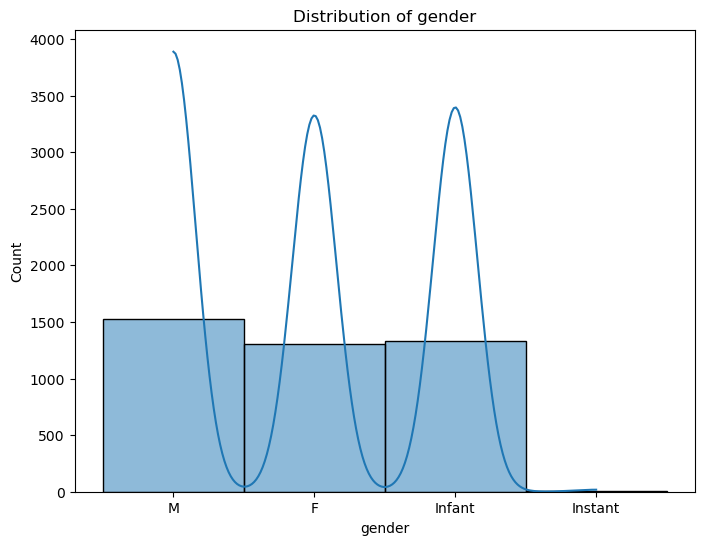

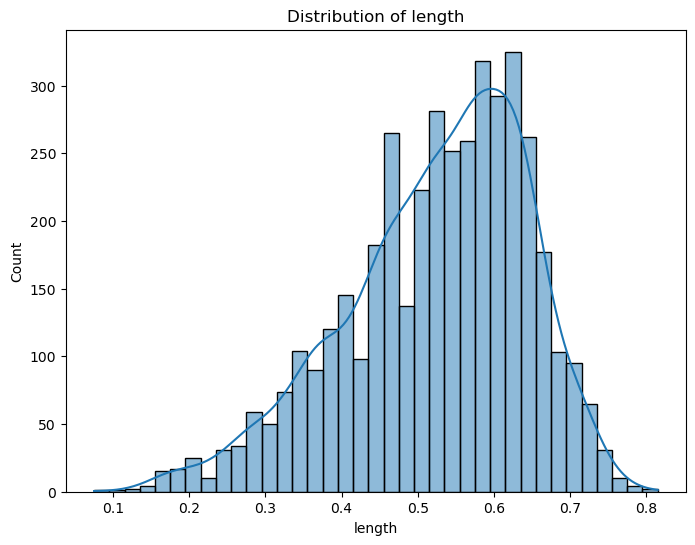

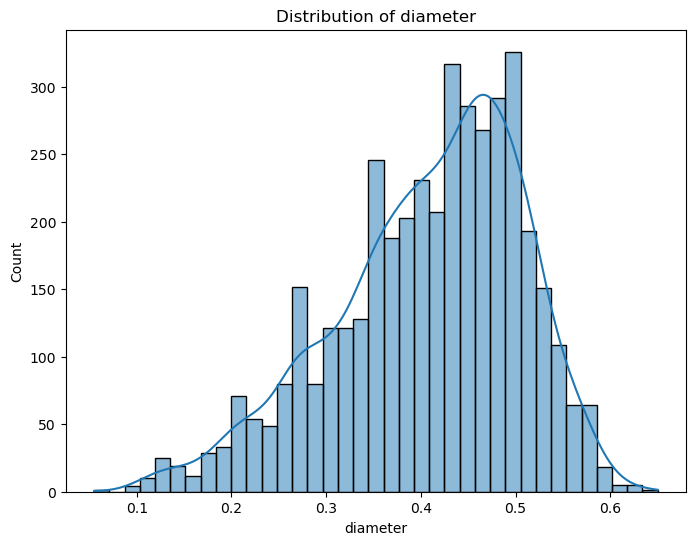

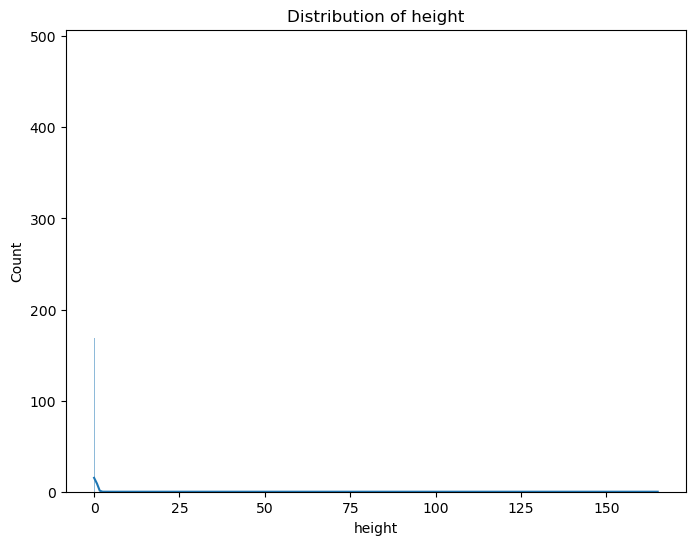

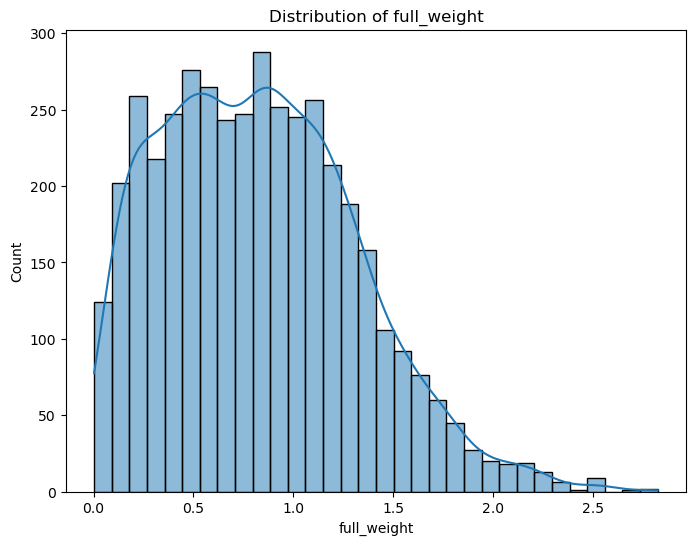

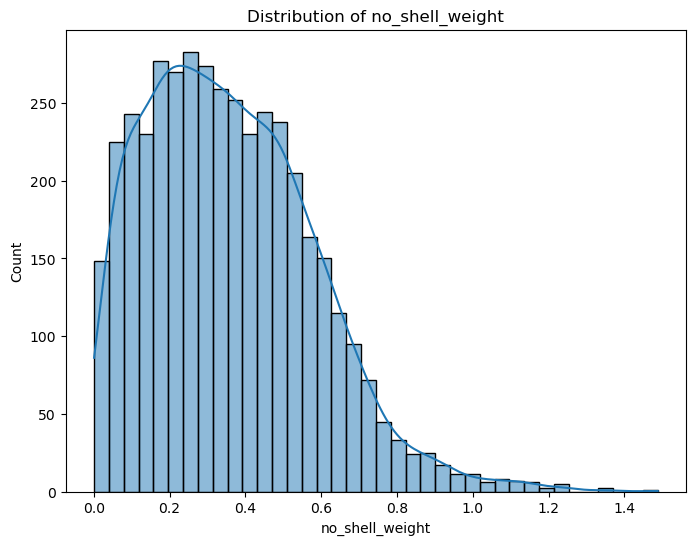

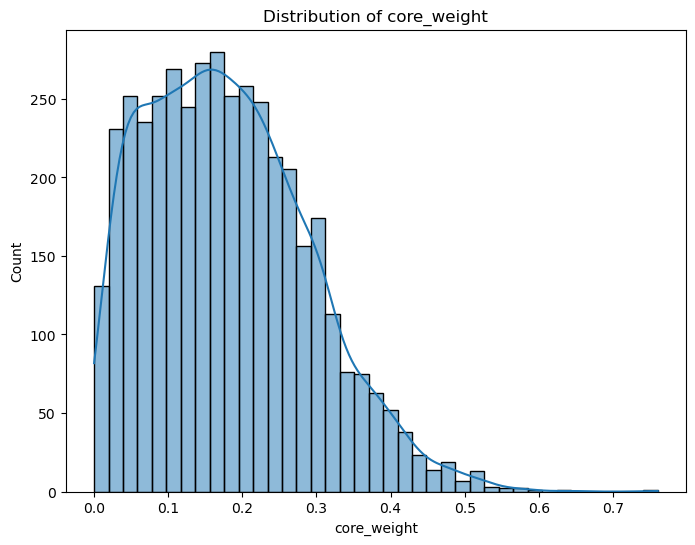

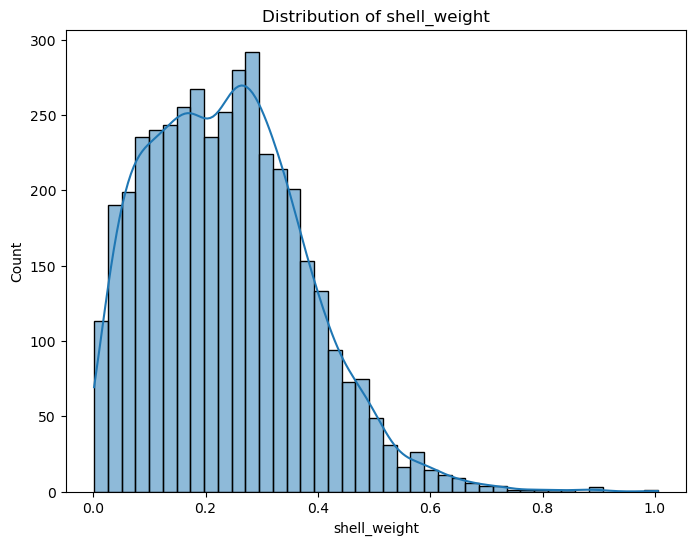

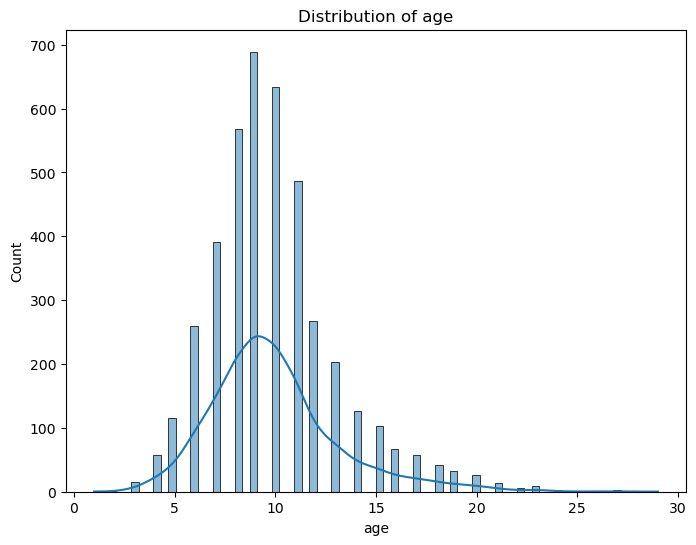

In [5]:
# Visualize distributions for selected columns
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

The code uses histograms with kernel density estimation (KDE) to visualize the distributions of the numerical variables in the dataset. Each histogram provides a visual representation of the distribution of a specific variable, showing the shape and spread of the data.

### Do you have missing values (do not fix this)? 

In [6]:
# Check for missing values
df.isnull().sum()

gender              0
length             14
diameter           14
height              0
full_weight         0
no_shell_weight     0
core_weight         0
shell_weight       30
age                 0
dtype: int64

The code checks for missing values using df.isnull().sum(). It shows the count of missing values for each column. If there are missing values, they are identified, but the code doesn't attempt to fix them as per the instruction.

### Are there any typos (not just misspellings but other things that just don't seem right)? 

In [7]:
#Lets check the unique value of the categorical column
df.gender.unique()

array(['M', 'F', 'Infant', 'Instant'], dtype=object)

In [8]:
#lets print out the column names
df.columns

Index(['gender', 'length', 'diameter', 'height', 'full_weight',
       'no_shell_weight', 'core_weight', 'shell_weight', 'age'],
      dtype='object')

The code checks for missing values using df.isnull().sum(). It shows the count of missing values for each column. If there are missing values, they are identified, but the code doesn't attempt to fix them as per the instruction.

### Is there any formatting that causes Python to think a number is a string?


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4177 non-null   object 
 1   length           4163 non-null   float64
 2   diameter         4163 non-null   float64
 3   height           4177 non-null   float64
 4   full_weight      4177 non-null   float64
 5   no_shell_weight  4177 non-null   float64
 6   core_weight      4177 non-null   float64
 7   shell_weight     4147 non-null   float64
 8   age              4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


The code does not explicitly check for formatting issues that might cause Python to interpret a number as a string. However, the data types of the columns are displayed using df.info(), which have identify that no columns have unexpected data types.

###  Do you observe outliers?

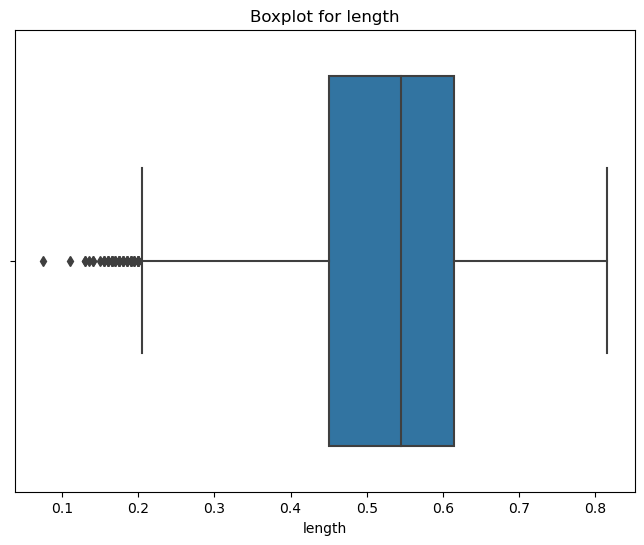

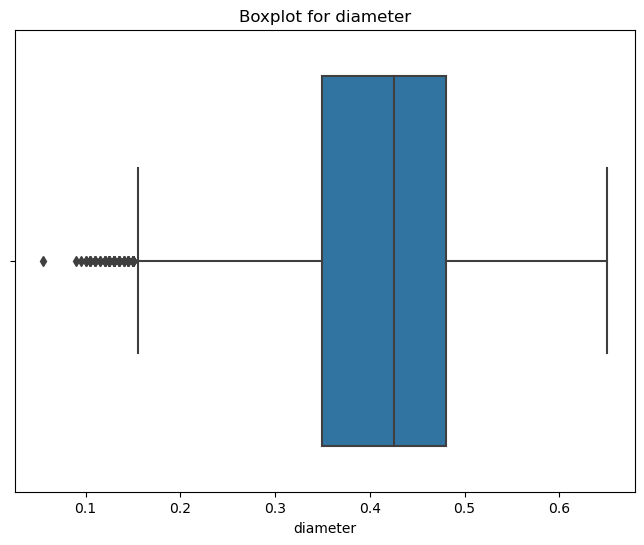

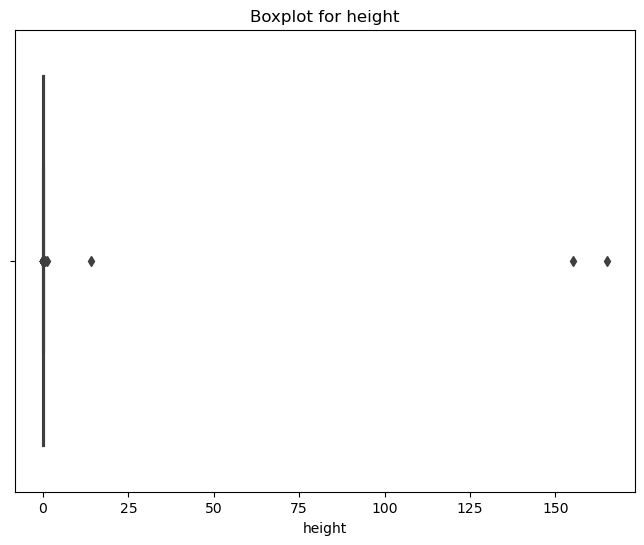

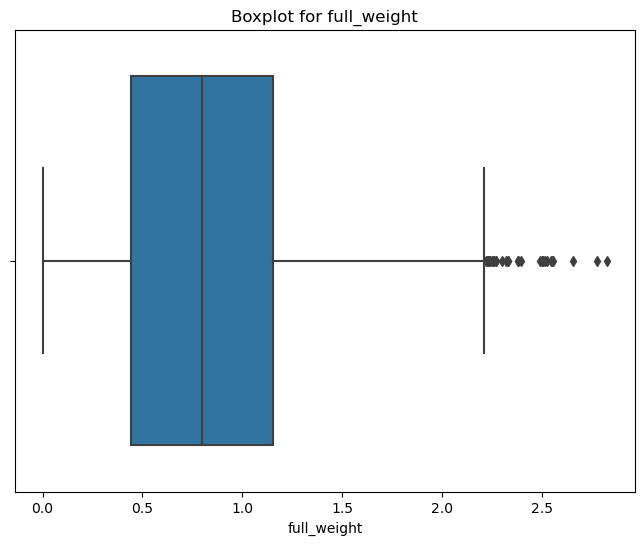

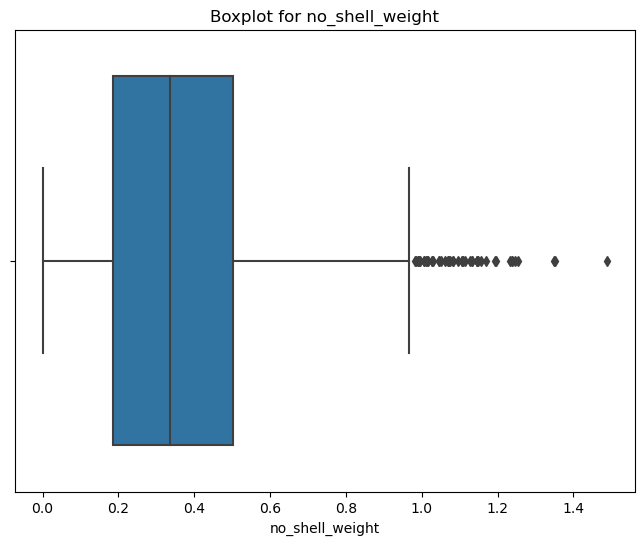

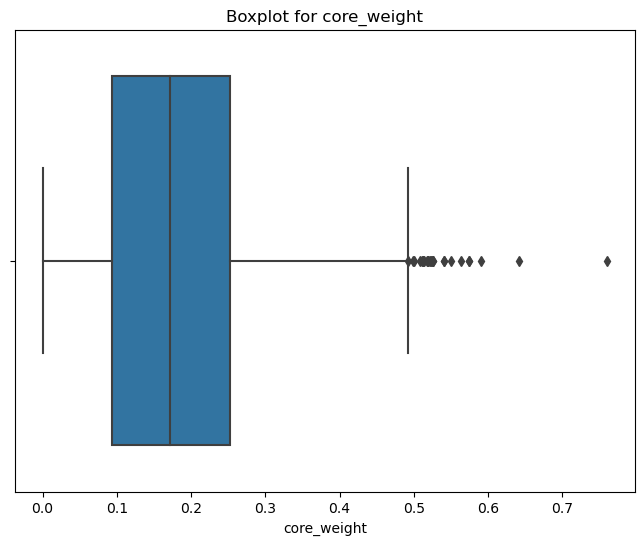

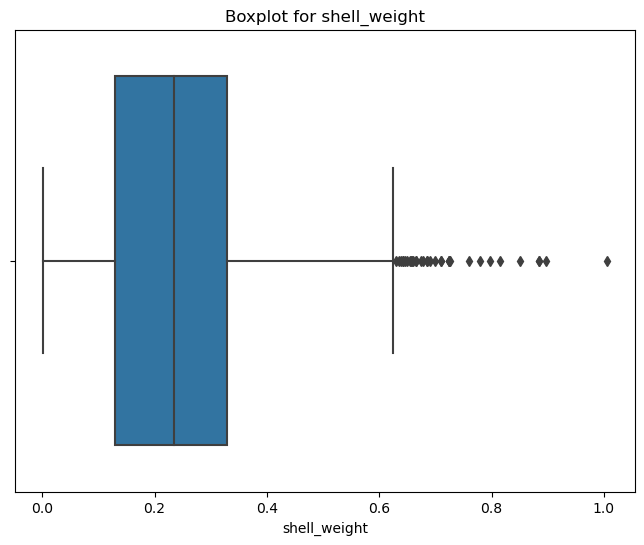

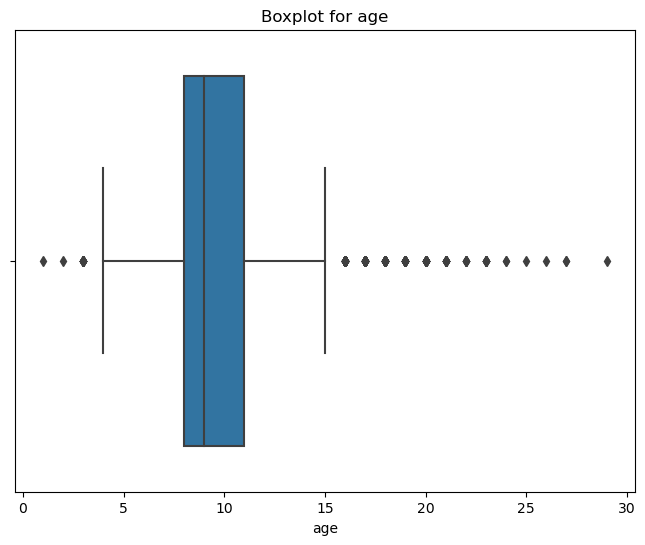

In [10]:
columns = ['length', 'diameter', 'height', 'full_weight','no_shell_weight', 'core_weight', 'shell_weight', 'age']

# Visualize outliers using boxplots
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

The code visualizes potential outliers for numerical columns using boxplots. It iterates through selected columns and displays boxplots to identify the presence of outliers. Outliers can be seen as points outside the whiskers of the boxplots.

### Are the outliers really outliers, or maybe typos?

The code does not explicitly address whether the outliers are genuine or potentially due to typos. It identifies and visualizes the outliers, but the determination of whether they are genuine or errors requires domain knowledge or further investigation.


### How do the different pairs of features correlate with one other?

In [11]:
# Calculate pairwise correlations between features
df.corr()

C:\Users\nkpoi\AppData\Local\Temp\ipykernel_7644\273749806.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age
length,1.000000,0.986836,0.031092,0.925109,0.897713,0.902941,0.898193,0.556459
diameter,0.986836,1.000000,0.023029,0.925500,0.893227,0.899629,0.905727,0.574515
height,0.031092,0.023029,1.000000,0.021602,0.019173,0.026642,0.022889,0.008717
full_weight,0.925109,0.925500,0.021602,1.000000,0.969405,0.966375,0.955526,0.540390
no_shell_weight,0.897713,0.893227,0.019173,0.969405,1.000000,0.931961,0.883249,0.420884
core_weight,0.902941,0.899629,0.026642,0.966375,0.931961,1.000000,0.908726,0.503819
shell_weight,0.898193,0.905727,0.022889,0.955526,0.883249,0.908726,1.000000,0.627703
age,0.556459,0.574515,0.008717,0.540390,0.420884,0.503819,0.627703,1.000000


The code calculates the pairwise correlations between features using df.corr(). I then visualizes the correlation matrix using a heatmap, providing insights into how different features are correlated with each other. Positive values indicate positive correlations, negative values indicate negative correlations, and values close to zero indicate weak or no correlations.


### Do these correlations make sense? 

Yes, because it has provided correlation which indicates positive, negative and neutral correlation

### What is the relationship between the features and the target?

C:\Users\nkpoi\AppData\Local\Temp\ipykernel_7644\483874741.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


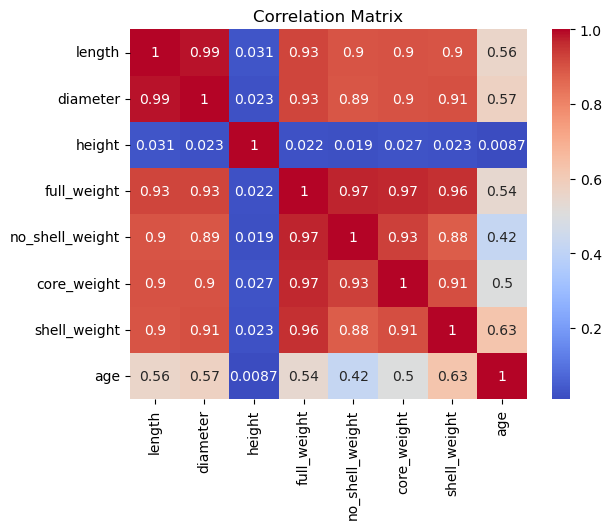

In [12]:
# Visualize correlations using a heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Since the target variables was not specified, I could not account for the relationship between the features and the target.

### Do any features exhibit skew?

In [13]:
# Check for skewness in features
df.skew()



C:\Users\nkpoi\AppData\Local\Temp\ipykernel_7644\163626559.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


length             -0.640581
diameter           -0.609110
height             45.498975
full_weight         0.530959
no_shell_weight     0.719098
core_weight         0.591852
shell_weight        0.617831
age                 1.114102
dtype: float64

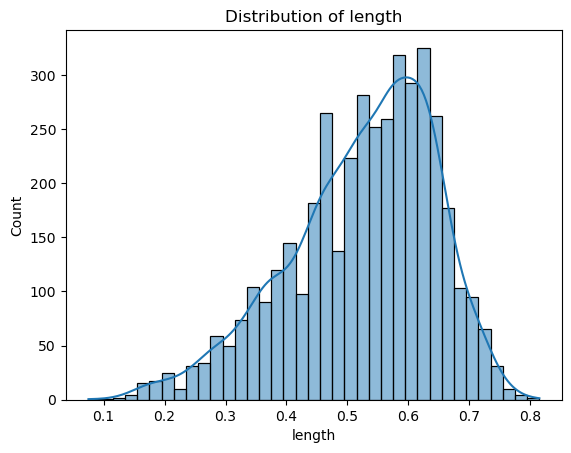

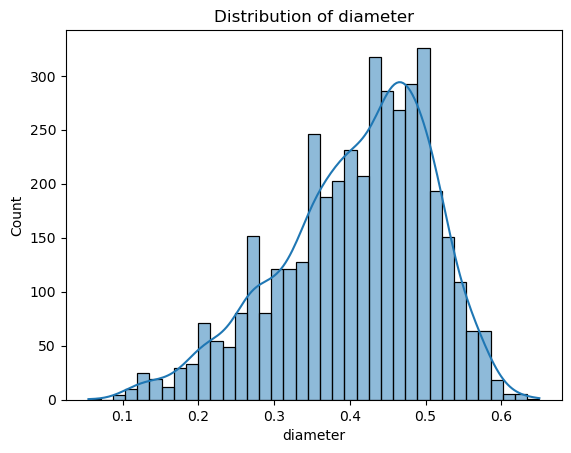

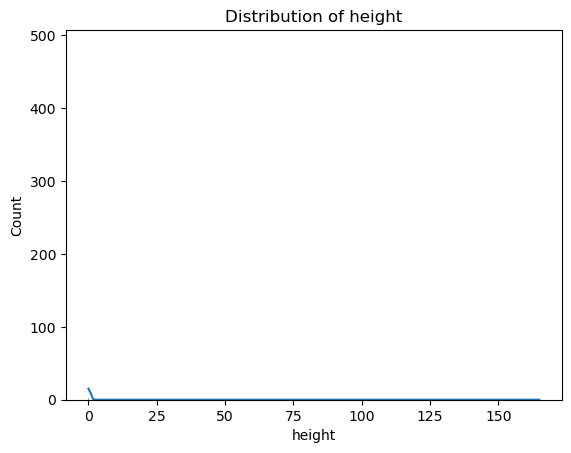

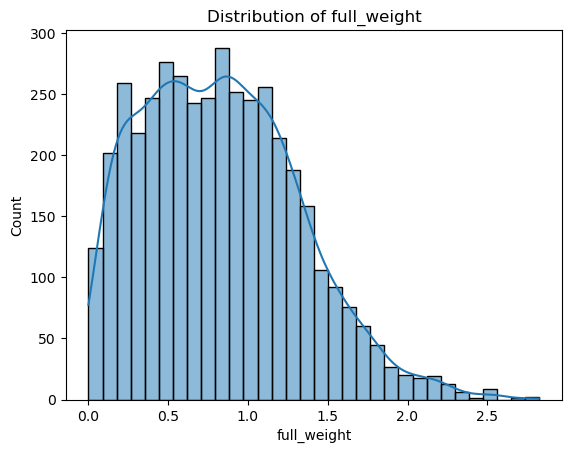

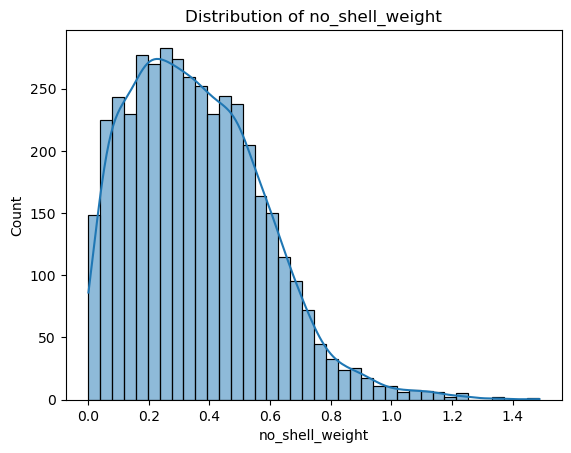

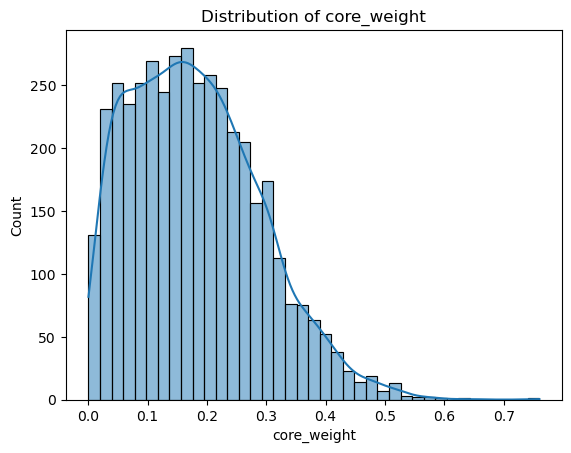

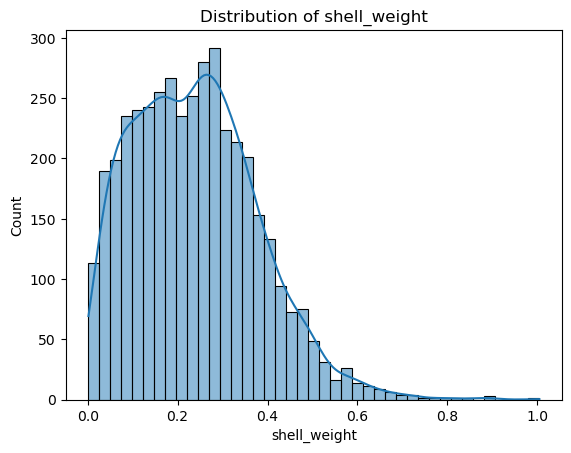

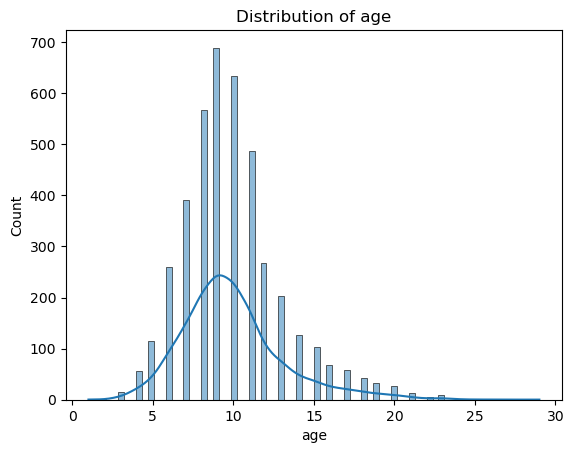

In [14]:
# Visualize skewness 
for column in columns:
    
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


The code calculates skewness for numerical columns using df.skew(). Skewness measures the asymmetry of the distribution of a variable. Positive skewness indicates a right-skewed distribution (tail on the right), and negative skewness indicates a left-skewed distribution (tail on the left).
me of the feature exhibits a positive skewness while some exhibits a negative skewness.

### What do you know now that will inform the modeling strategy?


Based on the analysis conducted on the dataset, I can form a modeling strategy considering the insights gained from the exploration. Here's a suggested modeling strategy based on the observations:

1. Feature Selection:
    

Identify Important Features: Review the correlation matrix to identify features that have a significant correlation with the target variable (if available). These features can be strong candidates for inclusion in my predictive model.

2. Data Preprocessing:
    
Handling Missing Values: If there are missing values in important features, consider strategies such as imputation (filling missing values with a calculated statistic) or removal of rows/columns with missing values, depending on the extent of missing data.

Outlier Treatment: Based on the boxplots, I can consider whether to remove outliers or apply transformations to mitigate their impact on the model. Outliers might distort the model, especially in algorithms sensitive to extreme values.

Feature Transformation: If any features exhibit skewness, I consider applying transformations (such as logarithmic or Box-Cox) to make the data more normally distributed, especially if you plan to use algorithms sensitive to feature distribution.

Encoding Categorical Variables: If there are categorical variables (like 'gender' in your case), encode them into numerical values using techniques like one-hot encoding or label encoding, depending on the nature of the categorical variable.

Feature Scaling: Scale numerical features if you plan to use algorithms where feature magnitude matters, like gradient-based algorithms (e.g., gradient boosting, neural networks).

3. Model Selection:
    
Choose Appropriate Models: Based on the nature of the problem (regression, classification, etc.) and the size of the dataset, select suitable models. For example, linear regression for regression tasks, random forests or gradient boosting for complex non-linear relationships, and logistic regression or decision trees for classification tasks.

Consider Ensemble Methods: Since there is a lack of a clear linear relationship between features and the target, consider ensemble methods like Random Forests and Gradient Boosting. They often handle complex relationships well and are less prone to overfitting.

Cross-Validation: Implement cross-validation techniques (such as k-fold cross-validation) to assess the model's performance on different subsets of the data. This helps in obtaining a more accurate evaluation of the model's performance and generalizability.

4. Model Training and Evaluation:
    
Split the Data: Split the dataset into training and testing sets to train the model on one subset and validate its performance on another unseen subset.



# Feature Engineering

### Step 1: Data Cleaning 

In [15]:
df.isnull().sum()

gender              0
length             14
diameter           14
height              0
full_weight         0
no_shell_weight     0
core_weight         0
shell_weight       30
age                 0
dtype: int64

In [16]:
#Dropping Null values
df.dropna(inplace=True)

### Step 2: Encoding Categorical Variables (Gender)

In [17]:
from sklearn.preprocessing import LabelEncoder
# 1. Handling Categorical Variable (Gender)
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

The categorical variable 'gender' is converted into numerical values using Label Encoding, where 'M' is mapped to 0 and 'F' is mapped to 1.

**Importance:** Machine learning algorithms work with numerical data, so converting categorical variables like gender into numerical values ensures compatibility with the algorithms. Label Encoding is used when the categorical variable has an ordinal relationship, preserving the order.

### Step 3: Feature Scaling using StandardScaler

In [18]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
columns_to_scale = ['length', 'diameter', 'height', 'full_weight', 'no_shell_weight', 'core_weight', 'shell_weight', 'age']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


**Importance:** Standardizing features (scaling them to have a mean of 0 and a standard deviation of 1) is crucial, especially for algorithms like Support Vector Machines (SVM) or K-Means Clustering, where the scale of features can impact the model's performance. It ensures that all features contribute equally to the analysis.

### Step 4: Volume Calculation Feature

In [19]:
# Volume Calculation feature
df['volume'] = (4/3) * np.pi * df['length'] * df['diameter'] * df['height']


A new feature 'volume' is created based on the snail's length, diameter, and height. This feature represents the volume of the snail calculated using the formula for the volume of a cylinder.

**Importance:** Creating new features, like the volume of the snail in this case, can provide the model with valuable information. This engineered feature captures the overall size of the snail, which might be a significant factor affecting various biological processes.

## Step 5: Winsorization to Handle Outliers

In [20]:
# Winsorization to handle outliers
for column in columns_to_scale + ['volume']:
    df[column] = winsorize(df[column], limits=[0.05, 0.05])


**Importance:** Outliers can significantly affect the model's performance. Winsorization helps by capping extreme values, making the dataset more robust against outliers, ensuring that the model is less sensitive to unusual observations.



In [21]:
df.head()

,gender,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age,volume
0,3,-0.578300,-0.435620,-0.035573,-0.644484,-0.610346,-0.729023,-0.640447,1.571711,-0.037537
1,3,-1.453841,-1.444598,-0.036989,-1.232605,-1.173212,-1.207325,-1.215565,-0.911794,-0.325405
2,0,0.047087,0.119319,-0.024242,-0.312200,-0.466252,-0.360047,-0.209109,-0.290918,-0.000571
4,1,-1.620611,-1.545496,-0.039822,-1.274396,-1.218242,-1.289319,-1.323400,-0.911794,-0.417786
5,1,-0.828454,-1.091456,-0.035573,-0.975748,-0.986341,-0.943120,-0.856117,-0.601356,-0.134734


### Step 6: Polynomial Features Generation

In [22]:
# Custom Polynomial Features Generation for selected columns
degree = 2  # Degree of the polynomial features

# Generate polynomial features for selected columns
poly_features = []
for feature in columns_to_scale:
    for deg in range(1, degree + 1):
        poly_feature = np.power(df[feature], deg)
        poly_features.append(poly_feature)

# Create a DataFrame for polynomial features
poly_columns = []
for feature in columns_to_scale:
    for deg in range(1, degree + 1):
        poly_columns.append(f"{feature}^{deg}")

poly_df = pd.DataFrame(np.array(poly_features).T, columns=poly_columns)

# Concatenate the polynomial features with the original dataset
df = pd.concat([df, poly_df], axis=1)


**Importance:**
This approach allows for fine-tuning the polynomial features generation process. By specifying the degree, we control the complexity of the interactions captured. Customizing the feature names also provides a clear understanding of the relationships encoded in the polynomial features.

In [23]:
poly_df.head()

,length^1,length^2,diameter^1,diameter^2,height^1,height^2,full_weight^1,full_weight^2,no_shell_weight^1,no_shell_weight^2,core_weight^1,core_weight^2,shell_weight^1,shell_weight^2,age^1,age^2
0,-0.578300,0.334430,-0.435620,0.189765,-0.035573,0.001265,-0.644484,0.415360,-0.610346,0.372522,-0.729023,0.531474,-0.640447,0.410173,1.571711,2.470274
1,-1.453841,2.113655,-1.444598,2.086865,-0.036989,0.001368,-1.232605,1.519316,-1.173212,1.376427,-1.207325,1.457633,-1.215565,1.477599,-0.911794,0.831369
2,0.047087,0.002217,0.119319,0.014237,-0.024242,0.000588,-0.312200,0.097469,-0.466252,0.217391,-0.360047,0.129634,-0.209109,0.043726,-0.290918,0.084633
3,-1.620611,2.626381,-1.545496,2.388559,-0.039822,0.001586,-1.274396,1.624084,-1.218242,1.484112,-1.289319,1.662344,-1.323400,1.751388,-0.911794,0.831369
4,-0.828454,0.686337,-1.091456,1.191276,-0.035573,0.001265,-0.975748,0.952084,-0.986341,0.972868,-0.943120,0.889475,-0.856117,0.732936,-0.601356,0.361629


In [24]:
df.head()

,gender,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age,volume,...,full_weight^1,full_weight^2,no_shell_weight^1,no_shell_weight^2,core_weight^1,core_weight^2,shell_weight^1,shell_weight^2,age^1,age^2
0,3.0,-0.578300,-0.435620,-0.035573,-0.644484,-0.610346,-0.729023,-0.640447,1.571711,-0.037537,...,-0.644484,0.415360,-0.610346,0.372522,-0.729023,0.531474,-0.640447,0.410173,1.571711,2.470274
1,3.0,-1.453841,-1.444598,-0.036989,-1.232605,-1.173212,-1.207325,-1.215565,-0.911794,-0.325405,...,-1.232605,1.519316,-1.173212,1.376427,-1.207325,1.457633,-1.215565,1.477599,-0.911794,0.831369
2,0.0,0.047087,0.119319,-0.024242,-0.312200,-0.466252,-0.360047,-0.209109,-0.290918,-0.000571,...,-0.312200,0.097469,-0.466252,0.217391,-0.360047,0.129634,-0.209109,0.043726,-0.290918,0.084633
4,1.0,-1.620611,-1.545496,-0.039822,-1.274396,-1.218242,-1.289319,-1.323400,-0.911794,-0.417786,...,-0.975748,0.952084,-0.986341,0.972868,-0.943120,0.889475,-0.856117,0.732936,-0.601356,0.361629
5,1.0,-0.828454,-1.091456,-0.035573,-0.975748,-0.986341,-0.943120,-0.856117,-0.601356,-0.134734,...,-0.107326,0.011519,-0.554059,0.306982,-0.360047,0.129634,0.653569,0.427152,1.882149,3.542484


# Step 8: Visualize Distributions of Engineered Features

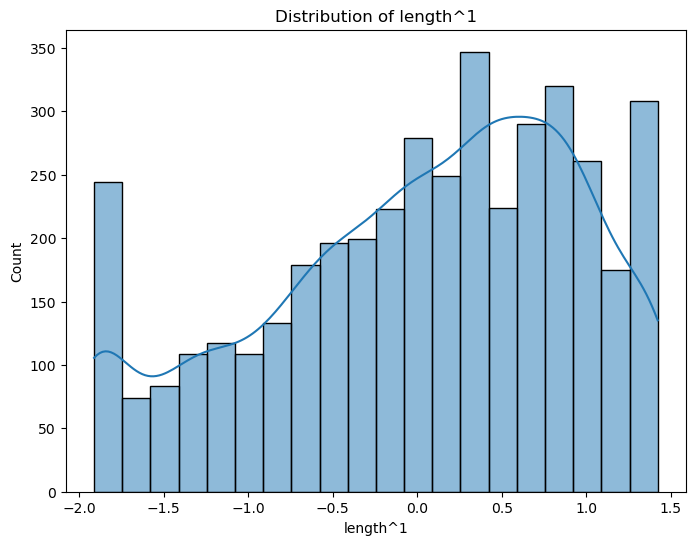

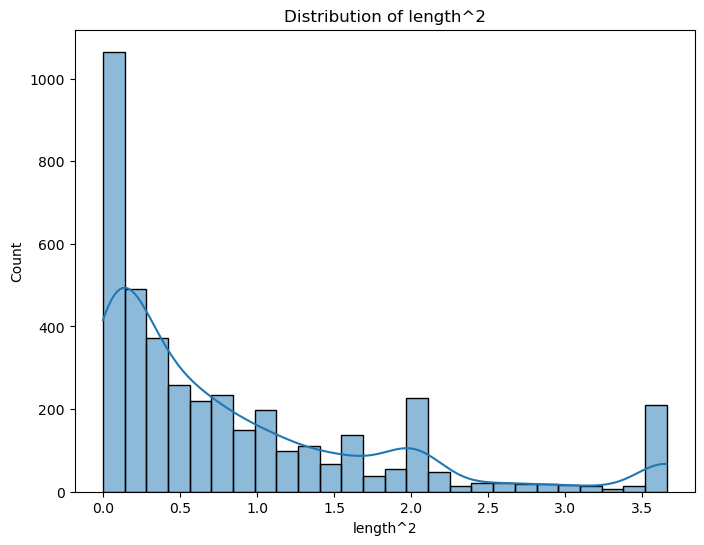

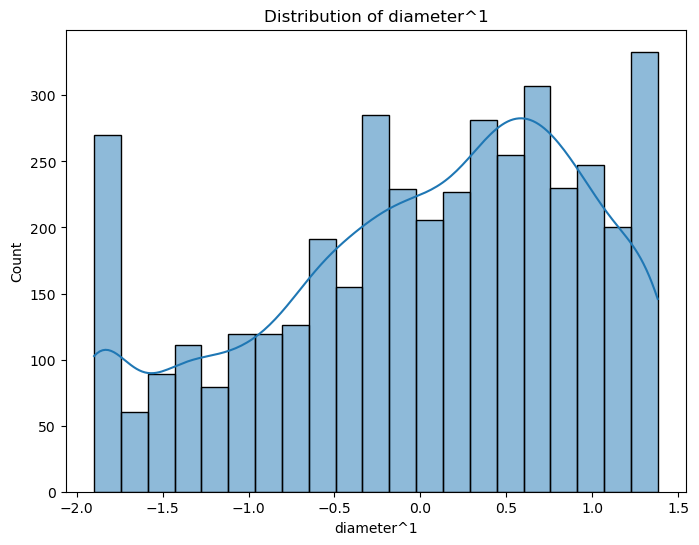

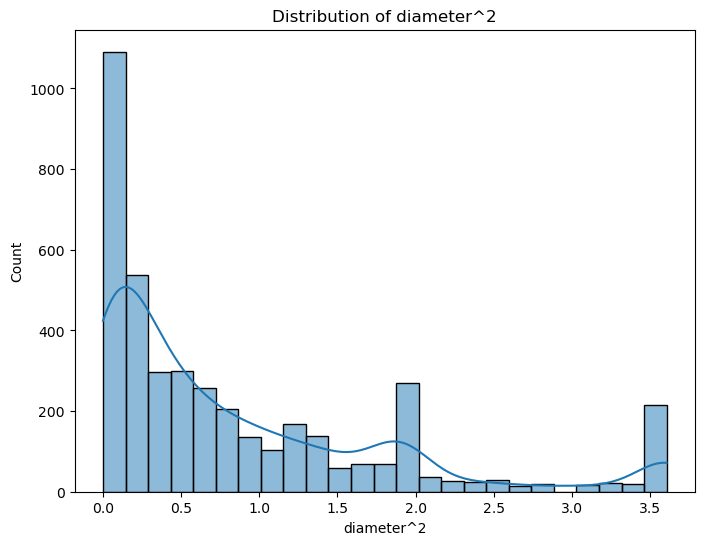

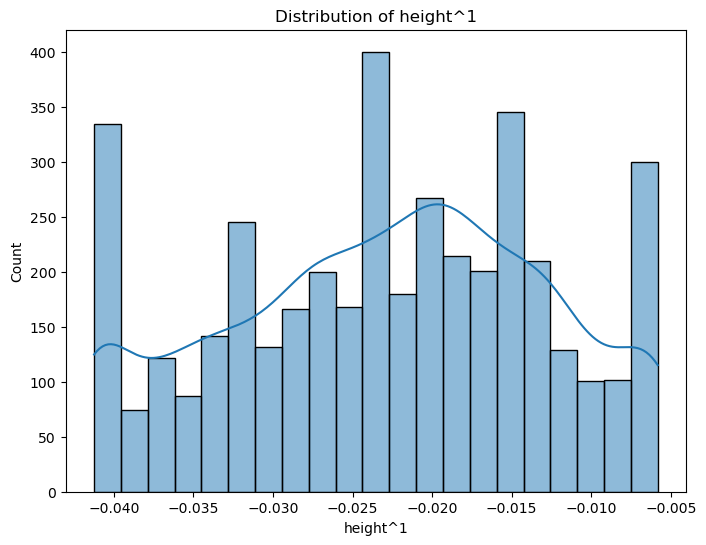

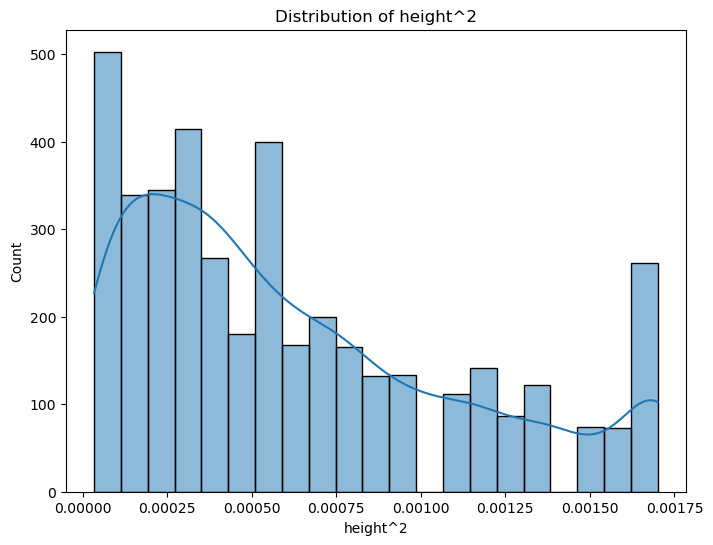

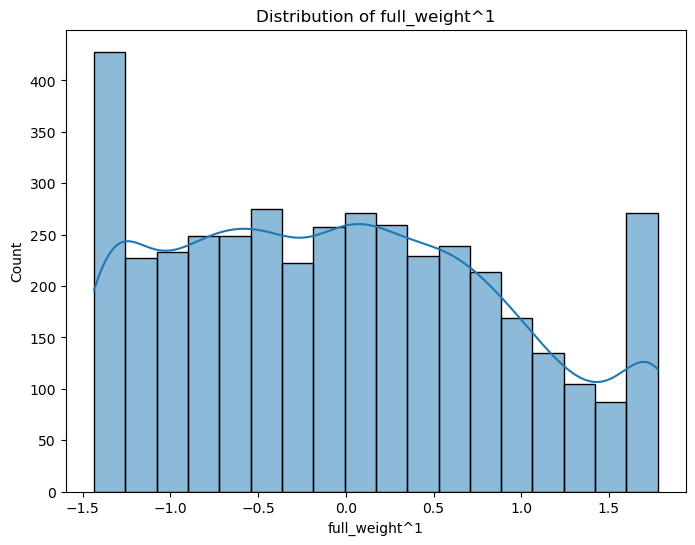

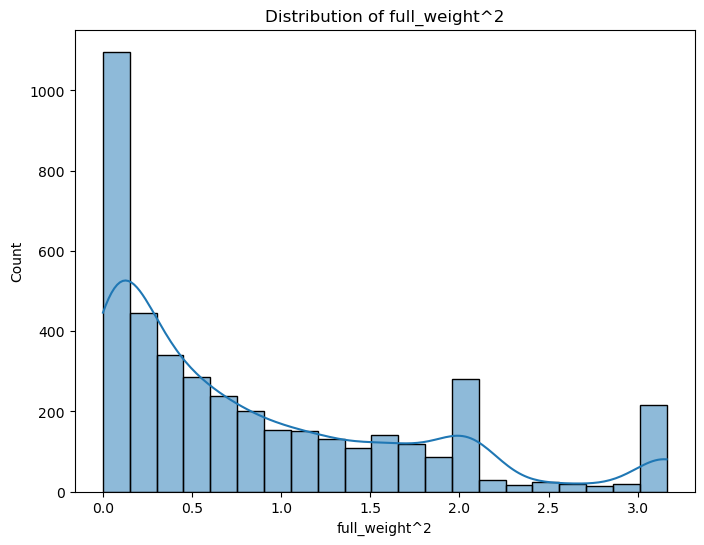

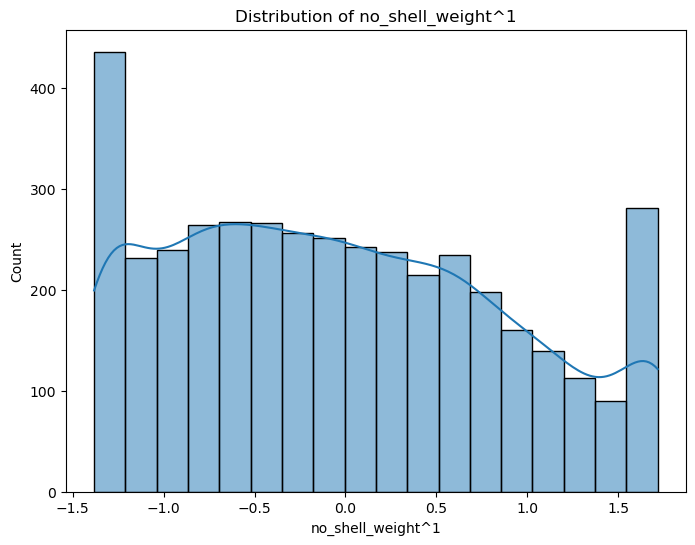

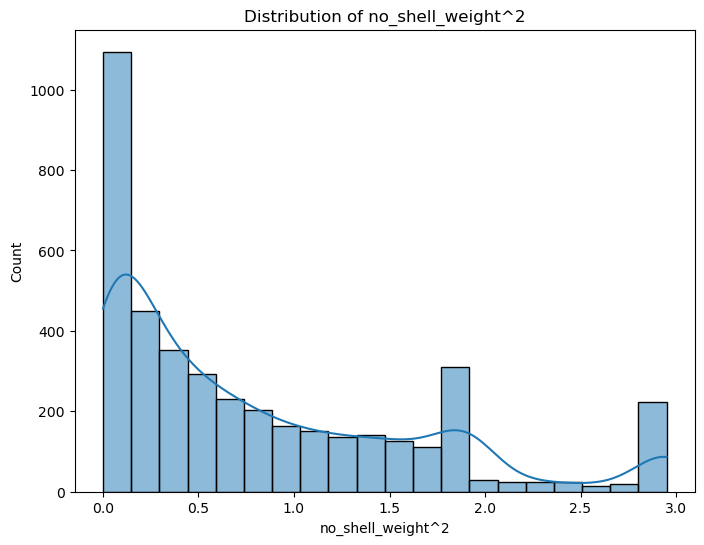

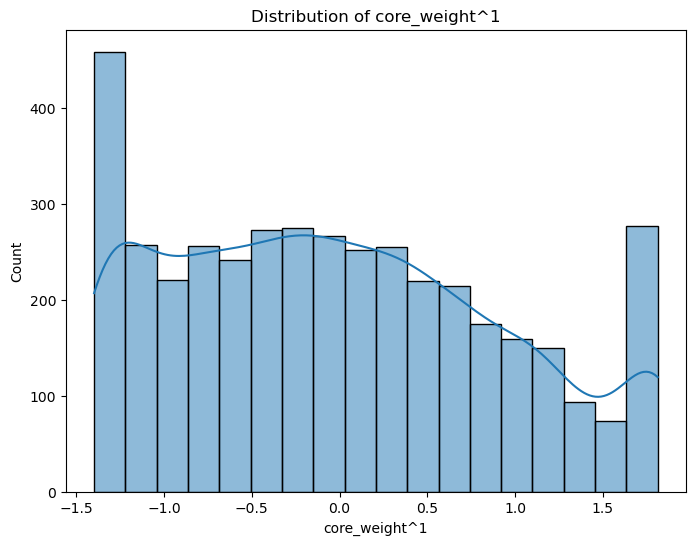

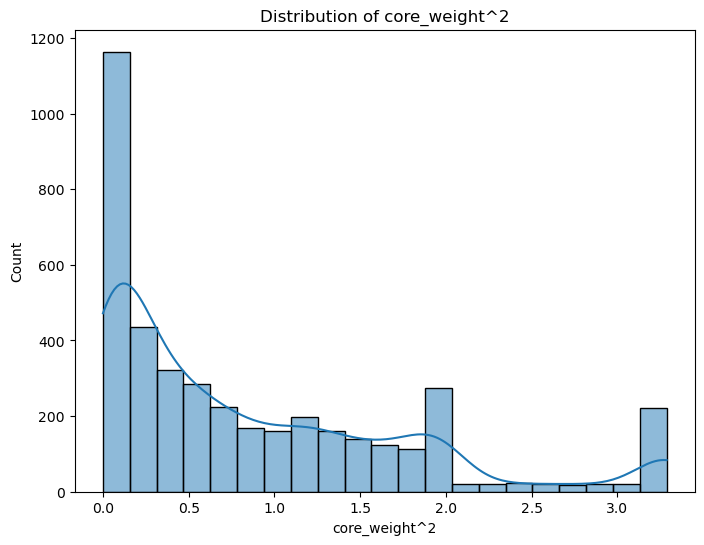

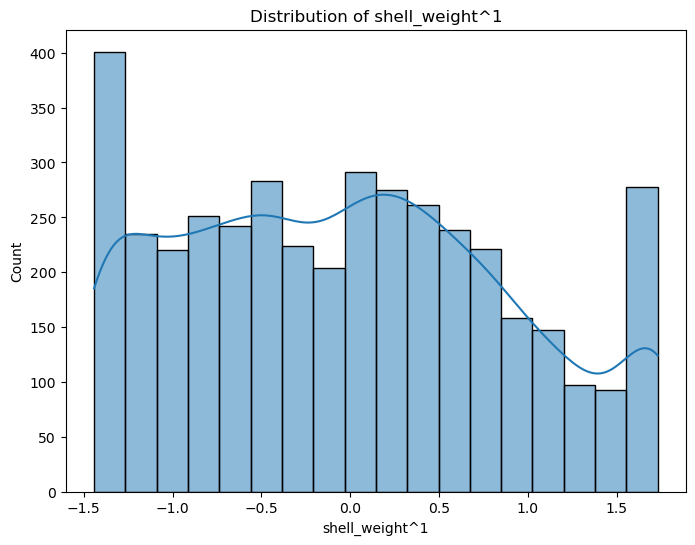

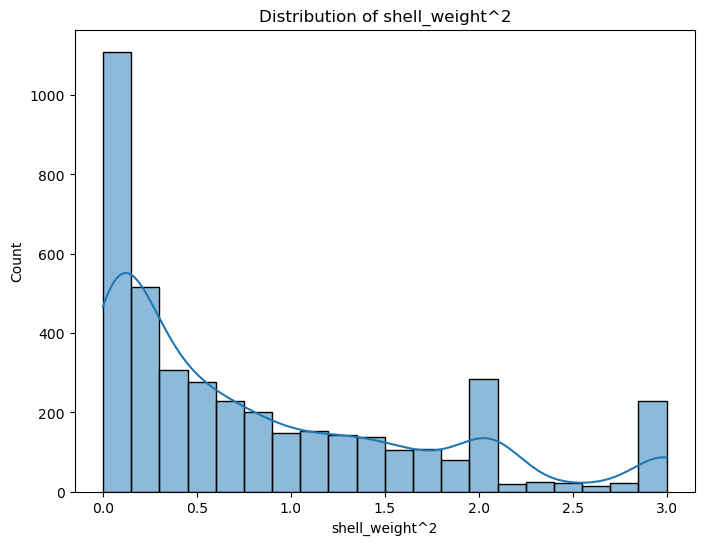

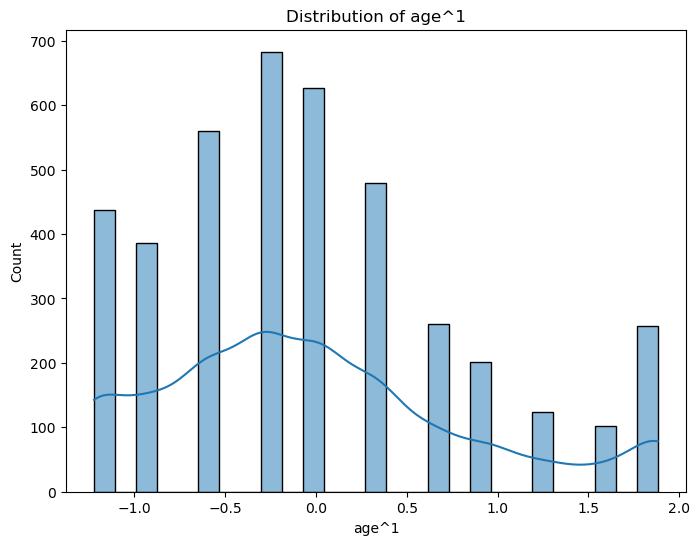

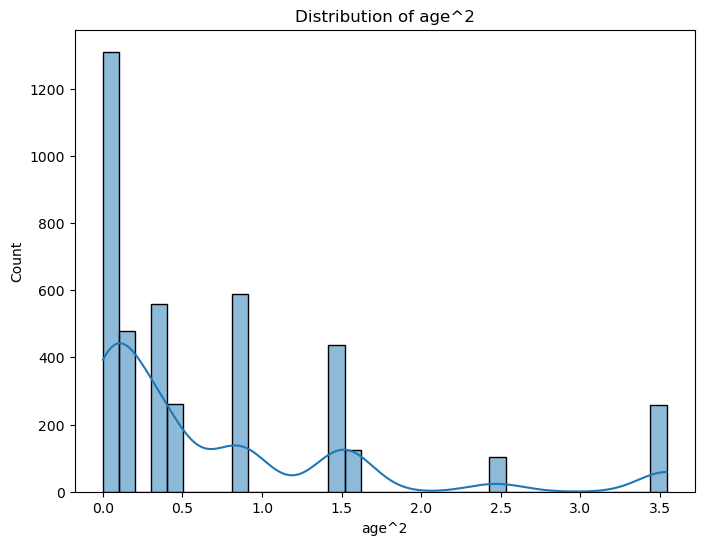

In [25]:
# Visualize distributions of engineered features
engineered_features = poly_columns  # List of engineered feature names

for feature in engineered_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


Visualizing the distributions of engineered features is crucial for several reasons. Firstly, it helps us understand how the data is shaped—whether it's normal, skewed, or has specific patterns. Secondly, it allows us to spot outliers, which could indicate errors or important data points needing further attention. It also helps validate complex transformations, ensuring the generated features match the underlying data. Understanding these distributions makes our models easier to explain, especially since some algorithms require specific data patterns. Lastly, by observing these distributions, we can choose features that are consistent or follow expected patterns, making our modeling decisions more reliable.

In [31]:
# Save the DataFrame to a CSV file
df.to_csv('clean_snail_size.xlsx', index=False)